In [1]:
#!pip install celery

In [2]:
#!sudo rabbitmqctl add_user myguest myguestpwd
#!sudo rabbitmqctl set_permissions -p / myguest "." "." ".*"

In [3]:
!sudo rabbitmqctl list_users

Listing users ...
guest	[administrator]
myguest	[]


In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.datasets import make_blobs
from copy import deepcopy

from celery import group
from test_workers import message_to_workers1

import celery

In [5]:
myresult=group(message_to_workers1.s('hello'))()
myresult.get()

['None_ForkPoolWorker-4_3_hello_675_1554255392.8058877']

In [6]:
myresult=group(message_to_workers1.s('hi'))() 
myresult.get()

['None_ForkPoolWorker-1_0_hi_675_1554255393.7636838']

In [7]:
myresult=group(message_to_workers1.s('haha'))() 
myresult.get()

['None_ForkPoolWorker-2_1_haha_675_1554255394.8525374']

In [8]:
celery.current_app.control.inspect().ping()

{'celery@ip-172-31-0-150': {'ok': 'pong'}}

In [9]:
celery.current_app.control.inspect().stats().keys()

dict_keys(['celery@ip-172-31-0-150'])

In [10]:
from celery import Celery

def my_monitor(app):
    state = app.events.State()

    def announce_failed_tasks(event):
        state.event(event)
        # task name is sent only with -received event, and state
        # will keep track of this for us.
        task = state.tasks.get(event['uuid'])

        print('TASK FAILED: %s[%s] %s' % (
            task.name, task.uuid, task.info(),))

    with app.connection() as connection:
        recv = app.events.Receiver(connection, handlers={
                'task-failed': announce_failed_tasks,
        })
        recv.capture(limit=None, timeout=None, wakeup=True)


#app = Celery(broker='amqp://guest@localhost//')
#my_monitor(app)
my_monitor(celery.current_app)

KeyboardInterrupt: 

In [18]:
#class assignnment
#lazy_partials_Estep = group(kmeans_tasks.s(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)) for seq in Xsubseqs)() 
# call remote workers to run the sort task 
#tmp_partials_Estep = lazy_partials_Estep.get() # will wait for the tasks to return


(3, 2)
0.0
400
400
400
400


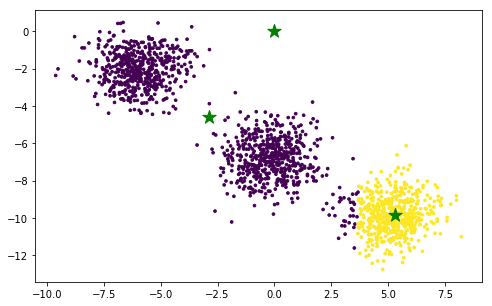

(3, 2)
0.0
400
400
400
400


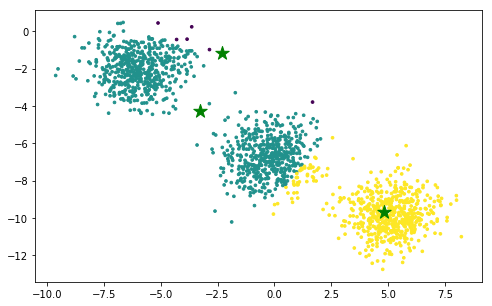

(3, 2)
0.0
400
400
400
400


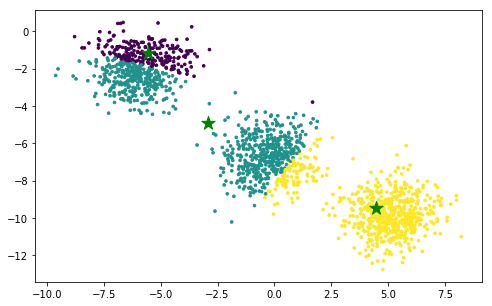

(3, 2)
0.0
400
400
400
400


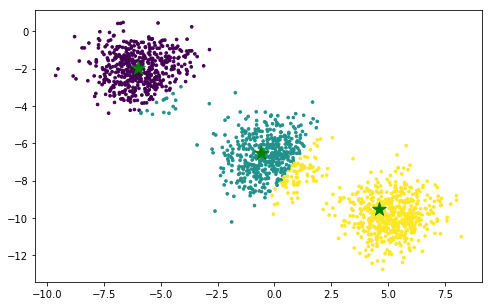

(3, 2)
0.0
400
400
400
400


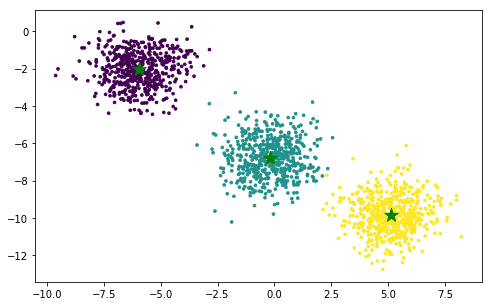

In [15]:
for iter in range(0, n_iter):    

    print(C.shape)
    
    #class assignnment
    lazy_partials_Estep = group(kmeans_tasks.s(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)) 
                                               for seq in Xsubseqs)() 
    # call remote workers to run the sort task 
    tmp_partials_Estep = lazy_partials_Estep.get() # will wait for the tasks to return
    partials_Estep=[json.loads(seq)['X'] for seq in tmp_partials_Estep]

    #partials_Estep=[kmeans_tasks(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)) for seq in Xsubseqs]
    
    #centroid update assignnment
    lazy_partials_Mstep = group(kmeans_tasks.s(task='mstep', json_dump = 
                                               json.dumps({'X': seq, 'n_clusters': n_clusters, 'n_features':n_features}, 
                                                          cls=NumpyEncoder)) for seq in partials_Estep)()
    tmp_partials_Mstep = lazy_partials_Mstep.get()  
    partials_Mstep=[json.loads(seq)['C'] for seq in tmp_partials_Mstep]
    #partials_Mstep=[kmeans_tasks(task='mstep', json_dump = json.dumps({'X': seq, 'n_clusters': n_clusters, 'n_features':n_features}, cls=NumpyEncoder)) for seq in partials_Estep]
    
    C=np.sum(partials_Mstep,0)/n_workers
    C_old = deepcopy(C)
    error = dist(C, C_old, None)
    print(error)

    Xsubseqs=deepcopy(partials_Estep)
    
    # plotting
    mydata_updated=[]
    for seq in partials_Estep:
        mydata_updated.extend(seq)
        print(len(seq))
    len(mydata_updated)

    plt.rcParams['figure.figsize'] = (8, 5)
    fig = plt.figure()
    plt.scatter([actdata['points'][0] for actdata in mydata_updated], [actdata['points'][1] for actdata in mydata_updated],c=[actdata['label'] for actdata in mydata_updated], s=7)

    plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')
    plt.show()
    
    #time.sleep(2)

    
    

